In [59]:
import os
import pandas as pd
from glob import glob
import paramiko
from getpass import getpass
import traceback
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
os.chdir("/home/stotoshka/Documents/ANGEL_dev")

# Подготовка выборок для обучения


Выполнить скрипт TAP/prepare_TAP_train

# Конвертация в SDF

In [3]:
to_convert_files = glob("TAP/data/train/*_TAP_?.csv")
print(to_convert_files)

['TAP/data/train/test_TAP_3.csv', 'TAP/data/train/train_TAP_3.csv', 'TAP/data/train/train_TAP_2.csv', 'TAP/data/train/train_TAP_1.csv', 'TAP/data/train/train_TAP_5.csv', 'TAP/data/train/test_TAP_4.csv', 'TAP/data/train/train_TAP_4.csv', 'TAP/data/train/test_TAP_5.csv', 'TAP/data/train/test_TAP_1.csv', 'TAP/data/train/test_TAP_2.csv']


In [22]:
%%time
for file in to_convert_files:
	print(file)
	path_to_config = "TAP/data/converter_config.json"
	command = f"python tools/generateConfigForConverter.py -i {os.path.join(os.getcwd(),file)} -o {os.path.join(os.getcwd(),'TAP/data/sdf')} -c PEPTIDE -t 10 {path_to_config}"
	os.system(command)
	print("Convertation")
	convert_command = f"python tools/SeqToSDF.py {path_to_config}"
	os.system(convert_command)

TAP/data/train/test_TAP_3.csv
Success
Convertation
Success
--- 0.09916400909423828 seconds ---
TAP/data/train/train_TAP_3.csv
Success
Convertation
Success
--- 0.33040666580200195 seconds ---
TAP/data/train/train_TAP_2.csv
Success
Convertation
Success
--- 0.3714265823364258 seconds ---
TAP/data/train/train_TAP_1.csv
Success
Convertation
Success
--- 0.40101027488708496 seconds ---
TAP/data/train/train_TAP_5.csv
Success
Convertation
Success
--- 0.4345545768737793 seconds ---
TAP/data/train/test_TAP_4.csv
Success
Convertation
Success
--- 0.1026754379272461 seconds ---
TAP/data/train/train_TAP_4.csv
Success
Convertation
Success
--- 0.37614870071411133 seconds ---
TAP/data/train/test_TAP_5.csv
Success
Convertation
Success
--- 0.1119074821472168 seconds ---
TAP/data/train/test_TAP_1.csv
Success
Convertation
Success
--- 0.11736416816711426 seconds ---
TAP/data/train/test_TAP_2.csv
Success
Convertation
Success
--- 0.11547088623046875 seconds ---
CPU times: user 221 µs, sys: 10.6 ms, total: 10.8

In [23]:
%%bash
cd /home/stotoshka/Documents/ANGEL_dev
rm TAP/data/sdf/*.txt
cp TAP/data/sdf/* /run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/TAP/sdf

# Генерация заданий для обучения и валидации


In [24]:
train_files = glob("/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/TAP/sdf/train*.sdf")
print(train_files)

['/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/TAP/sdf/train_TAP_1.sdf', '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/TAP/sdf/train_TAP_2.sdf', '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/TAP/sdf/train_TAP_3.sdf', '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/TAP/sdf/train_TAP_4.sdf', '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/TAP/sdf/train_TAP_5.sdf']


In [25]:
for file in train_files:
	for level in range(2,13):
		name = os.path.splitext(os.path.basename(file))[0]
		print(f"{name}_{level}")
		command = f"python tools/generateConfigForTrain.py -l {level} -b {name}_{level} -s sdf/{os.path.basename(file)} -a activity -p models/{name}_{level} /run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/TAP/{name}_{level}_tr.txt"
		os.system(command)

train_TAP_1_2
Success
train_TAP_1_3
Success
train_TAP_1_4
Success
train_TAP_1_5
Success
train_TAP_1_6
Success
train_TAP_1_7
Success
train_TAP_1_8
Success
train_TAP_1_9
Success
train_TAP_1_10
Success
train_TAP_1_11
Success
train_TAP_1_12
Success
train_TAP_2_2
Success
train_TAP_2_3
Success
train_TAP_2_4
Success
train_TAP_2_5
Success
train_TAP_2_6
Success
train_TAP_2_7
Success
train_TAP_2_8
Success
train_TAP_2_9
Success
train_TAP_2_10
Success
train_TAP_2_11
Success
train_TAP_2_12
Success
train_TAP_3_2
Success
train_TAP_3_3
Success
train_TAP_3_4
Success
train_TAP_3_5
Success
train_TAP_3_6
Success
train_TAP_3_7
Success
train_TAP_3_8
Success
train_TAP_3_9
Success
train_TAP_3_10
Success
train_TAP_3_11
Success
train_TAP_3_12
Success
train_TAP_4_2
Success
train_TAP_4_3
Success
train_TAP_4_4
Success
train_TAP_4_5
Success
train_TAP_4_6
Success
train_TAP_4_7
Success
train_TAP_4_8
Success
train_TAP_4_9
Success
train_TAP_4_10
Success
train_TAP_4_11
Success
train_TAP_4_12
Success
train_TAP_5_2
Succes

In [26]:
test_files = glob("/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/TAP/sdf/test*.sdf")
print(test_files)

['/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/TAP/sdf/test_TAP_1.sdf', '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/TAP/sdf/test_TAP_2.sdf', '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/TAP/sdf/test_TAP_3.sdf', '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/TAP/sdf/test_TAP_4.sdf', '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/TAP/sdf/test_TAP_5.sdf']


In [27]:
for file in test_files:
	for level in range(2,13):
		name = os.path.splitext(os.path.basename(file))[0]
		print(f"{name}_{level}")
		command = f"python tools/generateConfigForPrediction.py -m models/{name.replace('test','train')}_{level}.MSAR -s sdf/{os.path.basename(file)} -a activity -p results /run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/TAP/{name}_{level}_val.txt"
		os.system(command)

test_TAP_1_2
Success
test_TAP_1_3
Success
test_TAP_1_4
Success
test_TAP_1_5
Success
test_TAP_1_6
Success
test_TAP_1_7
Success
test_TAP_1_8
Success
test_TAP_1_9
Success
test_TAP_1_10
Success
test_TAP_1_11
Success
test_TAP_1_12
Success
test_TAP_2_2
Success
test_TAP_2_3
Success
test_TAP_2_4
Success
test_TAP_2_5
Success
test_TAP_2_6
Success
test_TAP_2_7
Success
test_TAP_2_8
Success
test_TAP_2_9
Success
test_TAP_2_10
Success
test_TAP_2_11
Success
test_TAP_2_12
Success
test_TAP_3_2
Success
test_TAP_3_3
Success
test_TAP_3_4
Success
test_TAP_3_5
Success
test_TAP_3_6
Success
test_TAP_3_7
Success
test_TAP_3_8
Success
test_TAP_3_9
Success
test_TAP_3_10
Success
test_TAP_3_11
Success
test_TAP_3_12
Success
test_TAP_4_2
Success
test_TAP_4_3
Success
test_TAP_4_4
Success
test_TAP_4_5
Success
test_TAP_4_6
Success
test_TAP_4_7
Success
test_TAP_4_8
Success
test_TAP_4_9
Success
test_TAP_4_10
Success
test_TAP_4_11
Success
test_TAP_4_12
Success
test_TAP_5_2
Success
test_TAP_5_3
Success
test_TAP_5_4
Success
t

# Запуск обучения и валидации

In [28]:
def checkTrain(path):
	flag = False
	header = "No	 Check	 Number	 IAP	 20-Fold	 Activity Type"
	try:
		with open(path,"r",encoding="cp1252") as log:
			for line in log:
				if header in line:
					flag = True
	except:
		traceback.print_exc()
	finally:
		return flag

In [29]:
def checkValidation(path):
	try:
		f=False
		with open(path,"r",encoding="cp1252") as log:
			for line in log:
				if "are predicted" in line:
					comps = line.strip().split(" ")
					if int(comps[0]) == int(comps[2]):
						f = True
					else:
						f = False
	except:
		traceback.print_exc()
	finally:
		return f

In [46]:
tr_tasks =[os.path.basename(p) for p in glob("/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/TAP/*_tr.txt")]
tr_tasks.sort(key=len)
print(tr_tasks)

['train_TAP_1_2_tr.txt', 'train_TAP_1_3_tr.txt', 'train_TAP_1_4_tr.txt', 'train_TAP_1_5_tr.txt', 'train_TAP_1_6_tr.txt', 'train_TAP_1_7_tr.txt', 'train_TAP_1_8_tr.txt', 'train_TAP_1_9_tr.txt', 'train_TAP_2_2_tr.txt', 'train_TAP_2_3_tr.txt', 'train_TAP_2_4_tr.txt', 'train_TAP_2_5_tr.txt', 'train_TAP_2_6_tr.txt', 'train_TAP_2_7_tr.txt', 'train_TAP_2_8_tr.txt', 'train_TAP_2_9_tr.txt', 'train_TAP_3_2_tr.txt', 'train_TAP_3_3_tr.txt', 'train_TAP_3_4_tr.txt', 'train_TAP_3_5_tr.txt', 'train_TAP_3_6_tr.txt', 'train_TAP_3_7_tr.txt', 'train_TAP_3_8_tr.txt', 'train_TAP_3_9_tr.txt', 'train_TAP_4_2_tr.txt', 'train_TAP_4_3_tr.txt', 'train_TAP_4_4_tr.txt', 'train_TAP_4_5_tr.txt', 'train_TAP_4_6_tr.txt', 'train_TAP_4_7_tr.txt', 'train_TAP_4_8_tr.txt', 'train_TAP_4_9_tr.txt', 'train_TAP_5_2_tr.txt', 'train_TAP_5_3_tr.txt', 'train_TAP_5_4_tr.txt', 'train_TAP_5_5_tr.txt', 'train_TAP_5_6_tr.txt', 'train_TAP_5_7_tr.txt', 'train_TAP_5_8_tr.txt', 'train_TAP_5_9_tr.txt', 'train_TAP_1_10_tr.txt', 'train_TAP_1_1

In [47]:
val_tasks =[os.path.basename(p) for p in glob("/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/TAP/*_val.txt")]
val_tasks.sort(key=len)
print(val_tasks)

['test_TAP_1_2_val.txt', 'test_TAP_1_3_val.txt', 'test_TAP_1_4_val.txt', 'test_TAP_1_5_val.txt', 'test_TAP_1_6_val.txt', 'test_TAP_1_7_val.txt', 'test_TAP_1_8_val.txt', 'test_TAP_1_9_val.txt', 'test_TAP_2_2_val.txt', 'test_TAP_2_3_val.txt', 'test_TAP_2_4_val.txt', 'test_TAP_2_5_val.txt', 'test_TAP_2_6_val.txt', 'test_TAP_2_7_val.txt', 'test_TAP_2_8_val.txt', 'test_TAP_2_9_val.txt', 'test_TAP_3_2_val.txt', 'test_TAP_3_3_val.txt', 'test_TAP_3_4_val.txt', 'test_TAP_3_5_val.txt', 'test_TAP_3_6_val.txt', 'test_TAP_3_7_val.txt', 'test_TAP_3_8_val.txt', 'test_TAP_3_9_val.txt', 'test_TAP_4_2_val.txt', 'test_TAP_4_3_val.txt', 'test_TAP_4_4_val.txt', 'test_TAP_4_5_val.txt', 'test_TAP_4_6_val.txt', 'test_TAP_4_7_val.txt', 'test_TAP_4_8_val.txt', 'test_TAP_4_9_val.txt', 'test_TAP_5_2_val.txt', 'test_TAP_5_3_val.txt', 'test_TAP_5_4_val.txt', 'test_TAP_5_5_val.txt', 'test_TAP_5_6_val.txt', 'test_TAP_5_7_val.txt', 'test_TAP_5_8_val.txt', 'test_TAP_5_9_val.txt', 'test_TAP_1_10_val.txt', 'test_TAP_1_11

In [48]:
succeded_tr = []
for tr in tr_tasks:
    if checkTrain(
            f"/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/TAP/models/{tr.replace('_tr.txt', '')}.HST"):
        succeded_tr.append(tr)
succeded_tr

Traceback (most recent call last):
  File "/tmp/ipykernel_8793/686754089.py", line 5, in checkTrain
    with open(path,"r",encoding="cp1252") as log:
  File "/home/stotoshka/Soft/anaconda3/envs/research/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 282, in _modified_open
    return io_open(file, *args, **kwargs)
FileNotFoundError: [Errno 2] No such file or directory: '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/TAP/models/train_TAP_1_2.HST'
Traceback (most recent call last):
  File "/tmp/ipykernel_8793/686754089.py", line 5, in checkTrain
    with open(path,"r",encoding="cp1252") as log:
  File "/home/stotoshka/Soft/anaconda3/envs/research/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 282, in _modified_open
    return io_open(file, *args, **kwargs)
FileNotFoundError: [Errno 2] No such file or directory: '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/TAP/models/train_TAP_1_3.HST'
Traceback (most 

[]

In [49]:
succeded_val = []
for val in val_tasks:
    test_name = '_'.join(val.split("_")[0:-2]) + "-" + val.replace("_val.txt", "") + ".HST"
    if checkValidation(
            f"/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/TAP/results/{test_name}"):
        succeded_val.append(val)
succeded_val

Traceback (most recent call last):
  File "/tmp/ipykernel_8793/3708250900.py", line 4, in checkValidation
    with open(path,"r",encoding="cp1252") as log:
  File "/home/stotoshka/Soft/anaconda3/envs/research/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 282, in _modified_open
    return io_open(file, *args, **kwargs)
FileNotFoundError: [Errno 2] No such file or directory: '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/TAP/results/test_TAP_1-test_TAP_1_2.HST'
Traceback (most recent call last):
  File "/tmp/ipykernel_8793/3708250900.py", line 4, in checkValidation
    with open(path,"r",encoding="cp1252") as log:
  File "/home/stotoshka/Soft/anaconda3/envs/research/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 282, in _modified_open
    return io_open(file, *args, **kwargs)
FileNotFoundError: [Errno 2] No such file or directory: '/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/TAP/results/test_TAP_1-

[]

In [50]:
%%time
client = paramiko.SSHClient()
client.set_missing_host_key_policy(paramiko.AutoAddPolicy())
password = getpass()
client.connect('192.168.0.10', username='SmirnygaTotoshka', password=password)

for tr in tr_tasks:
    print(tr)
    if tr in succeded_tr:
        continue
    tr_command = r"C:\Users\SmirnygaTotoshka\Desktop\OLMPASS\OLMPASSdoSAR.exe C:\Users\SmirnygaTotoshka\Desktop\diplom\ANGEL\TAP\\" + tr
    stdin, stdout, stderr = client.exec_command(tr_command)  # Non-blocking call
    exit_status = stdout.channel.recv_exit_status()  # Blocking call
    if exit_status == 0:
        if checkTrain(
                f"/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/TAP/models/{tr.replace('_tr.txt', '')}.HST"):
            print("Train ended")
        else:
            print(f"{tr} ended with errors")
    else:
        print("Error", exit_status)
client.close()

train_TAP_1_2_tr.txt
Train ended
train_TAP_1_3_tr.txt
Train ended
train_TAP_1_4_tr.txt
Train ended
train_TAP_1_5_tr.txt
Train ended
train_TAP_1_6_tr.txt
Train ended
train_TAP_1_7_tr.txt
Train ended
train_TAP_1_8_tr.txt
Train ended
train_TAP_1_9_tr.txt
Train ended
train_TAP_2_2_tr.txt
Train ended
train_TAP_2_3_tr.txt
Train ended
train_TAP_2_4_tr.txt
Train ended
train_TAP_2_5_tr.txt
Train ended
train_TAP_2_6_tr.txt
Train ended
train_TAP_2_7_tr.txt
Train ended
train_TAP_2_8_tr.txt
Train ended
train_TAP_2_9_tr.txt
Train ended
train_TAP_3_2_tr.txt
Train ended
train_TAP_3_3_tr.txt
Train ended
train_TAP_3_4_tr.txt
Train ended
train_TAP_3_5_tr.txt
Train ended
train_TAP_3_6_tr.txt
Train ended
train_TAP_3_7_tr.txt
Train ended
train_TAP_3_8_tr.txt
Train ended
train_TAP_3_9_tr.txt
Train ended
train_TAP_4_2_tr.txt
Train ended
train_TAP_4_3_tr.txt
Train ended
train_TAP_4_4_tr.txt
Train ended
train_TAP_4_5_tr.txt
Train ended
train_TAP_4_6_tr.txt
Train ended
train_TAP_4_7_tr.txt
Train ended
train_TAP_

In [51]:
%%time
client.connect('192.168.0.10', username='SmirnygaTotoshka', password=password)
for val in val_tasks:
    print(val)
    if val in succeded_val:
        continue
    val_command = r"C:\Users\SmirnygaTotoshka\Desktop\OLMPASS\OLMPASS2CSV.exe C:\Users\SmirnygaTotoshka\Desktop\diplom\ANGEL\TAP\\" + val
    stdin_val, stdout_val, stderr_val = client.exec_command(val_command)  # Non-blocking call
    exit_status_val = stdout_val.channel.recv_exit_status()
    if exit_status_val == 0:
        test_name = '_'.join(val.split("_")[0:-2]) + "-" + val.replace("_val.txt", "").replace("test", "train") + ".HST"
        if checkValidation(
                f"/run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/TAP/results/{test_name}"):
            print("Validation ended")
        else:
            print(f"{val} ended with errors")
    else:
        print("Error validation", exit_status_val)
client.close()

test_TAP_1_2_val.txt
Validation ended
test_TAP_1_3_val.txt
Validation ended
test_TAP_1_4_val.txt
Validation ended
test_TAP_1_5_val.txt
Validation ended
test_TAP_1_6_val.txt
Validation ended
test_TAP_1_7_val.txt
Validation ended
test_TAP_1_8_val.txt
Validation ended
test_TAP_1_9_val.txt
Validation ended
test_TAP_2_2_val.txt
Validation ended
test_TAP_2_3_val.txt
Validation ended
test_TAP_2_4_val.txt
Validation ended
test_TAP_2_5_val.txt
Validation ended
test_TAP_2_6_val.txt
Validation ended
test_TAP_2_7_val.txt
Validation ended
test_TAP_2_8_val.txt
Validation ended
test_TAP_2_9_val.txt
Validation ended
test_TAP_3_2_val.txt
Validation ended
test_TAP_3_3_val.txt
Validation ended
test_TAP_3_4_val.txt
Validation ended
test_TAP_3_5_val.txt
Validation ended
test_TAP_3_6_val.txt
Validation ended
test_TAP_3_7_val.txt
Validation ended
test_TAP_3_8_val.txt
Validation ended
test_TAP_3_9_val.txt
Validation ended
test_TAP_4_2_val.txt
Validation ended
test_TAP_4_3_val.txt
Validation ended
test_TAP_4_4

# Обработка результатов


In [52]:
%%bash
cd /home/stotoshka/Documents/ANGEL_dev
cp /run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/TAP/models/*.HST TAP/data/results/5CV/internal
cp /run/user/1000/gvfs/smb-share:server=192.168.0.10,share=diplom/ANGEL/TAP/results/*.csv TAP/data/results/5CV/external

In [53]:
%%bash
cd /home/stotoshka/Documents/ANGEL_dev
python TAP/parse5CV.py internal console /home/stotoshka/Documents/ANGEL_dev/TAP/data/results/5CV/internal /home/stotoshka/Documents/ANGEL_dev/TAP/data/results/5CV/internal.xlsx
python TAP/parse5CV.py external console /home/stotoshka/Documents/ANGEL_dev/TAP/data/results/5CV/external /home/stotoshka/Documents/ANGEL_dev/TAP/data/results/5CV/external.xlsx

## Внутренняя валидация


In [54]:
internal_result = pd.read_excel("TAP/data/results/5CV/internal.xlsx").query("activity == 1")
internal_result.head()

,model_name,fold,descriptor_level,iap,twentyCV,activity,num_subst
1,TAP,2,7,0.8648,0.8633,1,380
3,TAP,3,10,0.8329,0.8182,1,375
5,TAP,2,4,0.8496,0.8537,1,357
7,TAP,2,3,0.8063,0.8052,1,292
9,TAP,1,3,0.7889,0.7912,1,289


<Axes: title={'center': 'TAP'}, xlabel='Уровень MNA дескрипторов', ylabel='AUC ROC 20CV'>

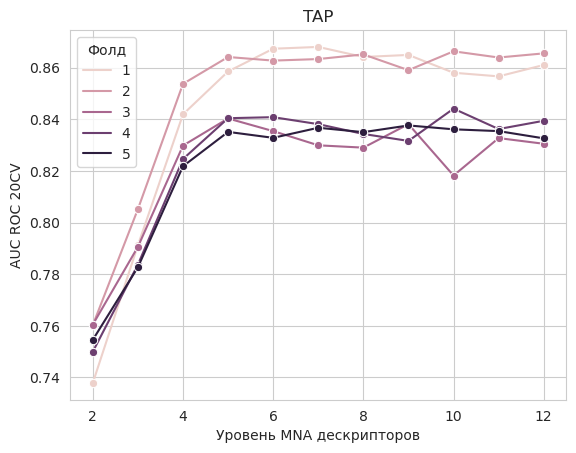

In [61]:
internal_plot = sns.lineplot(x = 'descriptor_level', y = 'twentyCV', data=internal_result, hue='fold', marker="o")
plt.xlabel("Уровень MNA дескрипторов")
plt.ylabel("AUC ROC 20CV")
plt.title("TAP")
plt.legend(title = "Фолд")
plt.savefig("TAP/data/results/5CV/plots/internal.png")
internal_plot

In [62]:
external_result = pd.read_excel("TAP/data/results/5CV/external.xlsx")
external_result.head()

,model,level,auc_roc,ap
0,TAP,10,0.858488,0.953780
1,TAP,12,0.860755,0.954863
2,TAP,11,0.858418,0.954269
3,TAP,6,0.855180,0.951997
4,TAP,7,0.856742,0.952510


<Axes: title={'center': 'TAP'}, xlabel='Уровень MNA дескрипторов', ylabel='AUC ROC'>

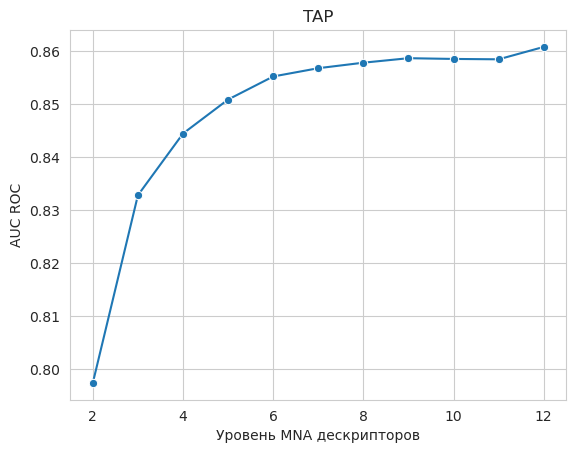

In [63]:
auc_plot = sns.lineplot(x='level', y='auc_roc', data=external_result, marker="o")
plt.xlabel("Уровень MNA дескрипторов")
plt.ylabel("AUC ROC")
plt.title("TAP")
plt.savefig("TAP/data/results/5CV/plots/auc_for_levels.png")
auc_plot

<Axes: title={'center': 'TAP'}, xlabel='Уровень MNA дескрипторов', ylabel='Average precision'>

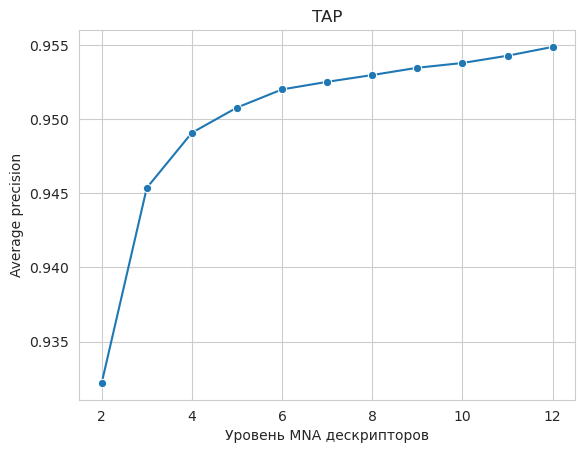

In [64]:
ap_plot = sns.lineplot(x='level', y='ap', data=external_result, marker="o")
plt.xlabel("Уровень MNA дескрипторов")
plt.ylabel("Average precision")
plt.title("TAP")
plt.savefig("TAP/data/results/5CV/plots/ap_for_levels.png")
ap_plot